In [1]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

## 1.

In [2]:
img = cv2.imread('HW1_Q3.png', cv2.IMREAD_GRAYSCALE)

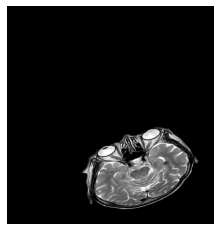

In [3]:
# disable x & y axis
plt.axis('off')
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)

In [4]:
# get the image shape
rows, cols = img.shape

## 2.

#### Define transformation function 

In [5]:
def translation_func(img, x_trans, y_trans):
    # get the image shape
    rows, cols = img.shape
    # transformation matrix for translation
    M = np.float32([[1, 0, x_trans],
                    [0, 1, y_trans],
                    [0, 0, 1]])
    translated_img = cv2.warpPerspective(img, M, (cols, rows))
    return translated_img

#### Define scaling function

In [6]:
def scaling_func(img, x_scale, y_scale):
	# get the image shape
	rows, cols = img.shape
	#transformation matrix for Scaling
	M = np.float32([[x_scale, 0  , 0],
					[0,   y_scale, 0],
					[0,   0,   1]])
	scaled_img = cv2.warpPerspective(img,M,(cols,rows))
	return scaled_img

#### Define shearing function

In [7]:
def shearing_func(img, shearing_axis, shear_val):
	# get the image shape
	rows, cols = img.shape
	# shearing applied to x-axis
	if shearing_axis == 'x':
		M = np.float32([[1, shear_val, 0],
						[shear_val, 1  , 0],
						[0, 0  , 1]])
	# shearing applied to y-axis
	else:
		M = np.float32([[1,   0, 0],
						[shear_val, 1, 0],
						[0,   0, 1]])
	# apply a perspective transformation to the image                
	sheared_img = cv2.warpPerspective(img,M,(int(cols*1.5),int(rows*1.5)))
	return sheared_img

#### Define rotation function

In [8]:
def rotation_func(img, _angle):
	# get the image shape
	rows, cols = img.shape
	#angle from degree to radian
	angle = np.radians(_angle)
	#transformation matrix for Rotation
	M = np.float32([[np.cos(angle), -(np.sin(angle)), 0],
					[np.sin(angle), np.cos(angle), 0],
					[0, 0, 1]])
	# apply a perspective transformation to the image
	rotated_img = cv2.warpPerspective(img, M, (int(cols),int(rows)))
	return rotated_img

### Combine all the methods to get a borderless image 

In [9]:
temp_img = translation_func(img, -350, -550)
temp_img = translation_func(temp_img, 200, 150)
temp_img = rotation_func(temp_img, 20)
temp_img = translation_func(temp_img, -20, -400)
temp_img = scaling_func(temp_img, 1.65, 2.7)

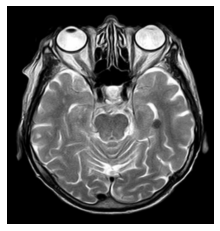

In [10]:
# disable x & y axis
plt.axis('off')
plt.imshow(temp_img, cmap = 'gray', vmin = 0, vmax = 255)

In [11]:
img.shape

(1142, 1083)

In [12]:
temp_img.shape

(1142, 1083)

In [13]:
new_img = temp_img

## 3.

In [14]:
new_width = int(img.shape[1]/2)
new_height = int(img.shape[0]/2)
img_half = cv2.resize(new_img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

In [15]:
img_half.shape

(571, 541)

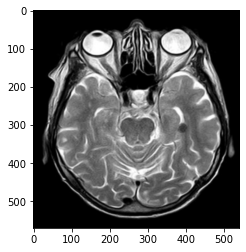

In [16]:
# disable x & y axis
# plt.axis('off')
plt.imshow(img_half, cmap='gray', vmin = 0, vmax = 255)

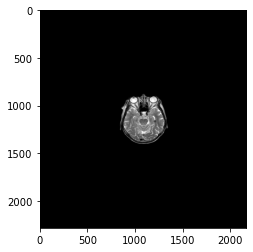

In [17]:
padded_image = np.zeros((img.shape[0] * 2, img.shape[1] * 2), dtype=np.uint8)
top_x = (padded_image.shape[0] - img_half.shape[0]) // 2
left_y = (padded_image.shape[1] - img_half.shape[1]) // 2
padded_image[top_x:top_x+img_half.shape[0], left_y:left_y+img_half.shape[1]] = img_half

# Show image
plt.imshow(padded_image, cmap='gray', vmin = 0, vmax = 255)

In [18]:
padded_image.shape[0] // img_half.shape[0]

4

### 4. Resampling vs Interpolation
#### TODO

### 5.

### To move the main part of the image to the top left
### y - y/4 = 3y/4 --> y = padded_image.shape/2 --> we have to move the center of the image 3y/8

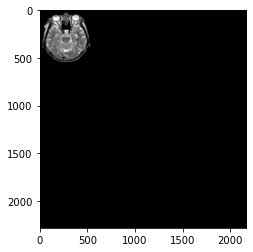

In [19]:
new_padded_image = translation_func(padded_image, -3*padded_image.shape[1]//8, -3*padded_image.shape[0]//8)
plt.imshow(new_padded_image, cmap='gray', vmin = 0, vmax = 255)

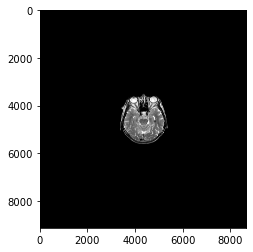

In [18]:
new_padded_image = padded_image
new_width = int(new_padded_image.shape[1]*4)
new_height = int(new_padded_image.shape[0]*4)
linear_scaled_img = cv2.resize(new_padded_image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
plt.imshow(linear_scaled_img, cmap='gray', vmin = 0, vmax = 255)

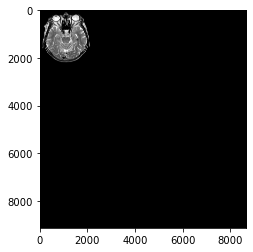

In [19]:
new_linear_scaled_img = translation_func(linear_scaled_img, -3*linear_scaled_img.shape[1]//8, -3*linear_scaled_img.shape[0]//8)
plt.imshow(new_linear_scaled_img, cmap='gray', vmin = 0, vmax = 255)

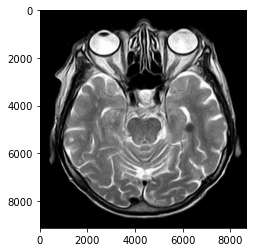

In [20]:
borderless_linear_scaled_img = scaling_func(new_linear_scaled_img, 4, 4)
plt.imshow(borderless_linear_scaled_img, cmap='gray', vmin = 0, vmax = 255)